In [514]:
import urllib
import json
import pandas as pd

# Get the dataset metadata by passing package_id to the package_search endpoint
# For example, to retrieve the metadata for this dataset:

url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_show"
params = { "id": "78c88292-5375-4373-a687-788a5ff19077", "limit": "1000"}
response = urllib.request.urlopen(url, data=bytes(json.dumps(params), encoding="utf-8"))
package = json.loads(response.read())

#print(package["result"])



In [532]:
# Get the data by passing the resource_id to the datastore_search endpoint
# See https://docs.ckan.org/en/latest/maintaining/datastore.html for detailed parameters options
# For example, to retrieve the data content for the first resource in the datastore:

for idx, resource in enumerate(package["result"]["resources"]):
    #if resource["datastore_active"]:
        url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/datastore_search"
        p = { "id": resource["id"], "limit" : "1000"}
        r = urllib.request.urlopen(url, data=bytes(json.dumps(p), encoding="utf-8"))
        data = json.loads(r.read())
        df = pd.DataFrame(data["result"]["records"])
    
        break
        
#Here is the data        
#df


In [516]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 9 columns):
# Positive               191 non-null int64
BLT Adults and Nymphs    191 non-null int64
BLT Larvae               191 non-null int64
Latitude                 191 non-null float64
Longitude                191 non-null float64
Park Location            191 non-null object
Total BLTs               191 non-null int64
Year                     191 non-null int64
_id                      191 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 13.5+ KB


,# Positive,BLT Adults and Nymphs,BLT Larvae,Latitude,Longitude,Total BLTs,Year,_id
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.0000
mean,0.879581,2.539267,0.115183,43.714954,-79.354375,2.539267,2017.094241,96.0000
std,5.547987,11.763336,0.938829,0.059057,0.129287,11.763336,1.444233,55.2811
min,0.000000,0.000000,0.000000,43.602787,-79.610324,0.000000,2013.000000,1.0000
25%,0.000000,0.000000,0.000000,43.660574,-79.459314,0.000000,2016.000000,48.5000
50%,0.000000,0.000000,0.000000,43.724281,-79.355428,0.000000,2017.000000,96.0000
75%,0.000000,1.000000,0.000000,43.756853,-79.221507,1.000000,2018.000000,143.5000
max,63.000000,122.000000,9.000000,43.811851,-79.151299,122.000000,2019.000000,191.0000


In [517]:
#let's change the year to date time 
pd.to_datetime(df.Year, format='%Y')

0     2013-01-01
1     2014-01-01
2     2014-01-01
3     2014-01-01
4     2014-01-01
5     2015-01-01
6     2015-01-01
7     2015-01-01
8     2015-01-01
9     2015-01-01
10    2015-01-01
11    2015-01-01
12    2015-01-01
13    2015-01-01
14    2015-01-01
15    2015-01-01
16    2015-01-01
17    2015-01-01
18    2015-01-01
19    2015-01-01
20    2015-01-01
21    2015-01-01
22    2015-01-01
23    2015-01-01
24    2015-01-01
25    2015-01-01
26    2015-01-01
27    2015-01-01
28    2015-01-01
29    2015-01-01
         ...    
161   2019-01-01
162   2019-01-01
163   2019-01-01
164   2019-01-01
165   2019-01-01
166   2019-01-01
167   2019-01-01
168   2019-01-01
169   2019-01-01
170   2019-01-01
171   2019-01-01
172   2019-01-01
173   2019-01-01
174   2019-01-01
175   2019-01-01
176   2019-01-01
177   2019-01-01
178   2019-01-01
179   2019-01-01
180   2019-01-01
181   2019-01-01
182   2019-01-01
183   2019-01-01
184   2019-01-01
185   2019-01-01
186   2019-01-01
187   2019-01-01
188   2019-01-

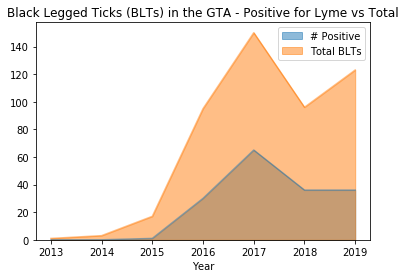

In [531]:
#let's look at the overall trend in the GTA
annual.plot(kind = "area", stacked = False, title = 'Black Legged Ticks (BLTs) in the GTA - Positive for Lyme vs Total')

In [495]:
#Now lets zoom in to see what's up in each park

by_park= df.groupby(["Year","Park Location"]).agg({"# Positive":"sum", "Total BLTs": "sum"})
by_park

# Positive  Total BLTs
Year Park Location                                                 
2013 Algonquin Island                                 0           1
2014 Algonquin Island                                 0           0
     Danforth Birchmount Parkette                     0           0
     Rouge Park                                       0           3
     Wards Island                                     0           0
2015 Algonquin Island                                 0           2
     Bob Hunter Park                                  0           0
     Brimley Woods Park                               0           0
     Cedar Ridge Park                                 0           1
     Centre Island                                    0           0
     Charles Sauriol Conservation Area                0           0
     Cudia Park                                       0           0
     Etobicoke Creek                                  0           0
     Greenvale Park                                   0           0
     Grey Abbey Park                                  0           0
     Guildwood Park                                   0           0
     Hanlan's Point                                   0           0
     Humber River                                     0           0
     Joyce Trimmer Park                               0           0
     Lavender Creek                                   0           0
     Leslie Grove Park                                0           0
     Milkman’s Lane                                   0           0
     Morningside Park                                 0           4
     Panorama Park                                    0           0
     Pine Point Park                                  0           0
     Rouge Park                                       1          10
     Rowntree Mills Park                              0           0
     South Marine Drive Park                          0           0
     Sunnybrook Park                                  0           0
     Sylvan Park                                      0           0
...                                                 ...         ...
2019 Cudia Park                                       0           0
     Earl Bales Park                                  0           0
     G. Ross Lord Park                                0           0
     Greenvale Park                                   0           0
     Guild Park and Gardens                           0           1
     High Park                                        0           2
     Highland Creek Park                              0           2
     Hinder Area                                      0           0
     Humberwood Park                                  0           0
     Lambton Park                                     0           1
     Magwood Park                                     0           1
     McCowan Park                                     0           1
     Moore Ravine Park                                0           0
     Morningside Park                                 1           6
     Pine Point Park                                  0           0
     Rouge Park: Glen Eagle Vista Trail              25          52
     Rowntree Mills Park                              0           0
     Scarborough Crescent Park                        0           0
     Sherwood Park                                    0           0
     Sunnybrook Park                                  0           0
     Sylvan Park                                      0           0
     Taylor Creek Park                                0           0
     Toronto Islands: Algonquin Island Park           0           7
     Toronto Islands: Centre Island                   0           1
     Toronto Islands: Ward's                          0           1
     Upper Rouge Trail Park                           9          39
     Warden Woods Park           

In [496]:

#Looks like there are a lot of counts of less than 5 total BLTs in a park 
#This will make the per-park trend hard to visualize against the much higher counts in some parks. 
#Let's clean those out and only look at Park/Years with counts over five
df_nozero=df[df["Total BLTs"]>5]
df_nozero

,# Positive,BLT Adults and Nymphs,BLT Larvae,Latitude,Longitude,Park Location,Total BLTs,Year,_id
25,1,10,0,43.811851,-79.151299,Rouge Park,10,2015,26
32,0,8,0,43.626120,-79.360567,Algonquin Island,8,2016,33
39,1,8,0,43.780349,-79.178148,Colonel Danforth Trail,8,2016,40
54,0,14,0,43.776814,-79.199891,Morningside Park,14,2016,55
59,29,63,0,43.811851,-79.151299,Rouge Park,63,2016,60
92,1,14,0,43.776814,-79.199891,Morningside Park,14,2017,93
97,63,122,0,43.811851,-79.151299,Rouge Park,122,2017,98
117,18,56,0,43.780349,-79.178148,Colonel Danforth Trail,56,2018,118
139,7,11,0,43.811851,-79.151299,Rouge Park,11,2018,140
146,10,19,0,43.809749,-79.187157,Upper Rouge Trail Park,19,2018,147


In [497]:
#This will be easier to visualize
df_nozero.groupby(["Park Location","Year"]).agg({"Total BLTs":"sum", "# Positive":"sum"})

Total BLTs  # Positive
Park Location                          Year                        
Algonquin Island                       2016           8           0
Colonel Danforth Trail                 2016           8           1
                                       2018          56          18
Morningside Park                       2016          14           0
                                       2017          14           1
                                       2019           6           1
Rouge Park                             2015          10           1
                                       2016          63          29
                                       2017         122          63
                                       2018          11           7
Rouge Park: Glen Eagle Vista Trail     2019          52          25
Toronto Islands: Algonquin Island Park 2019           7           0
Upper Rouge Trail Park                 2018          19          10
                                       2019          39           9

In [498]:
#Making a new df that only has the columns we need
df_clean = df_nozero[["Park Location","Year","# Positive", "Total BLTs"]]

In [500]:
#Grouping by year and park location
df_cleangrouped = df_pretty.groupby(["Year",'Park Location'])
totals = df_prettygrouped.sum()

In [503]:
import pandas as pd

# Creating a pivot to make the results easier to plot

result_BLTs = pd.pivot_table(totals, values=[ 'Total BLTs'], index=['Year'],
                    columns=['Park Location'], aggfunc=sum)
result_positives = pd.pivot_table(totals, values=[ "# Positive"], index=['Year'],
                    columns=['Park Location'], aggfunc=sum)


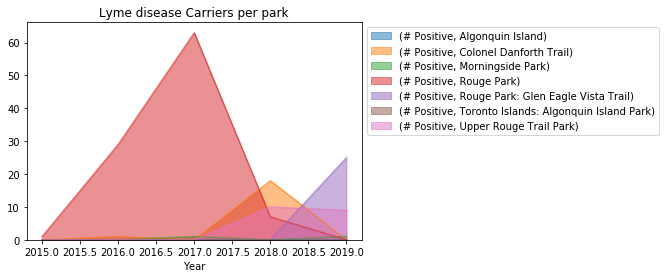

In [509]:


my_plot = result_positives.plot(kind='area', stacked = False, legend=True, title= "Lyme disease Carriers per park", sort_columns=True).legend(bbox_to_anchor=(1,1))


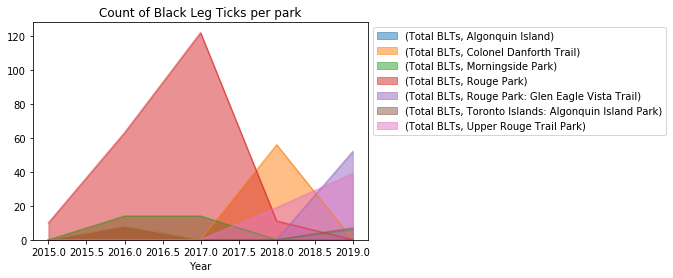

In [510]:
my_plot = result_BLTs.plot(kind='area', stacked = False, legend=True, title= "Count of Black Leg Ticks per park", sort_columns=True).legend(bbox_to_anchor=(1,1))
